In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
files = ["SH600000.csv","SH600010.csv","SH600015.csv","SH600016.csv","SH600018.csv","SH600028.csv","SH600030.csv",
         "SH600036.csv","SH600048.csv","SH600050.csv","SH600089.csv","SH600104.csv","SH600109.csv","SH600111.csv",
         "SH600150.csv","SH600256.csv","SH600406.csv","SH600518.csv","SH600519.csv","SH600583.csv","SH600585.csv",
         "SH600637.csv","SH600690.csv","SH600837.csv","SH600887.csv","SH600893.csv","SH600958.csv","SH600999.csv",
         "SH601006.csv","SH601088.csv","SH601166.csv","SH601169.csv","SH601186.csv","SH601288.csv","SH601318.csv",
         "SH601328.csv","SH601390.csv","SH601398.csv","SH601601.csv","SH601628.csv","SH601668.csv","SH601688.csv",
         "SH601766.csv","SH601800.csv","SH601818.csv","SH601857.csv","SH601901.csv","SH601988.csv","SH601989.csv",
         "SH601998.csv"]

In [3]:
df = pd.DataFrame()
stock = pd.read_csv("SH600000.csv")
df = pd.concat([df, stock['Close']], axis=1)
df

,Close
0,156.9592
1,156.5883
2,158.4426
3,159.5551
4,160.0186
...,...
751,158.0162
752,155.2172
753,156.2351
754,155.7262


In [4]:
df = pd.DataFrame()
for i in range(len(files)):
    stock = pd.read_csv(files[i])
    df = pd.concat([df, stock['Close']], axis=1)
df.columns=files
df

,SH600000.csv,SH600010.csv,SH600015.csv,SH600016.csv,SH600018.csv,SH600028.csv,SH600030.csv,SH600036.csv,SH600048.csv,SH600050.csv,...,SH601668.csv,SH601688.csv,SH601766.csv,SH601800.csv,SH601818.csv,SH601857.csv,SH601901.csv,SH601988.csv,SH601989.csv,SH601998.csv
0,156.9592,17.0165,40.5266,181.8570,6.8577,12.9606,87.3601,84.3431,176.9783,6.0251,...,11.0622,22.4050,11.9420,18.0033,5.1557,9.6238,7.8579,5.4247,10.1392,9.0669
1,156.5883,17.6114,40.3889,181.4688,6.8447,12.9097,85.9162,83.8954,182.1672,6.0873,...,10.9176,22.5605,11.7711,18.0151,5.1940,9.5730,8.0229,5.4247,10.2399,9.0800
2,158.4426,17.5519,41.4563,182.6333,6.9358,12.9861,87.7211,85.0146,183.2791,6.0873,...,11.3153,22.6049,11.9762,18.3208,5.2833,9.6364,8.8272,5.4876,10.1224,9.1195
3,159.5551,17.3734,40.8021,182.4392,6.9358,13.0879,90.5059,83.4925,186.4295,6.1341,...,12.4480,22.4161,12.2269,19.5085,5.2961,9.7252,9.2810,5.5662,9.8202,9.1985
4,160.0186,17.8494,40.4922,183.7978,6.9097,13.3171,91.0216,83.9402,185.3176,6.0873,...,13.4362,22.2496,13.4462,19.8142,5.3089,9.8520,9.2294,5.5977,9.8370,9.1064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,158.0162,11.0800,33.5002,162.7318,8.1519,15.6655,129.2350,184.2688,328.1806,9.2722,...,9.9581,22.8111,8.6001,11.1554,6.3388,7.7857,8.0981,6.7003,8.8836,9.0826
752,155.2172,10.8281,33.1494,161.4403,7.9562,15.4794,126.3303,183.5816,320.7965,9.1461,...,9.7389,22.2461,8.4668,10.8576,6.2816,7.6648,8.3988,6.6460,8.7487,9.0383
753,156.2351,10.9960,33.2809,161.6986,7.9702,15.5725,127.0427,186.5759,316.0789,9.1461,...,9.7571,22.6463,8.4789,10.8700,6.2673,7.6917,8.2225,6.6460,8.7993,9.0383
754,155.7262,10.9121,33.1055,160.9237,7.9282,15.5414,126.7687,185.4960,313.8227,9.1776,...,9.7754,22.6110,8.4426,10.7583,6.2529,7.6783,8.1396,6.6279,8.7656,8.9941


In [5]:
df2 = pd.read_csv('combined returns.csv',index_col=0).drop([0],axis=0)
df3 = pd.DataFrame({'mean':df2.mean(),'std': df2.std()})
df3

,mean,std
SH600000.csv,-0.000252,0.012186
SH600010.csv,-0.000337,0.018295
SH600015.csv,-0.000331,0.012073
SH600016.csv,-0.000369,0.010790
SH600018.csv,0.000321,0.017520
SH600028.csv,0.000665,0.014781
SH600030.csv,0.000250,0.017433
SH600036.csv,0.001121,0.017378
SH600048.csv,0.001068,0.023811
SH600050.csv,0.000934,0.024525


In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df4 = pd.DataFrame(MinMaxScaler().fit_transform(df3),index=df3.index,columns = df3.columns)
df4

,mean,std
SH600000.csv,0.307754,0.132403
SH600010.csv,0.275229,0.561930
SH600015.csv,0.277387,0.124439
SH600016.csv,0.262713,0.034285
SH600018.csv,0.527493,0.507495
SH600028.csv,0.659357,0.314859
SH600030.csv,0.500240,0.501349
SH600036.csv,0.834419,0.497509
SH600048.csv,0.814080,0.949803
SH600050.csv,0.762777,1.000000


In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
kmeans = KMeans(n_clusters=10, random_state=0).fit(df4)
df4['cluster'] = kmeans.labels_
# df4
silhouette_score(df4, kmeans.labels_)

0.7395764035282772

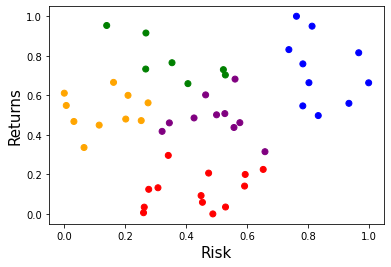

In [145]:
import matplotlib
colors = ['red','green','blue','purple','orange']
fig = plt.figure()
plt.scatter(df4['mean'],df4['std'],c=df4['cluster'], cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Risk',fontsize=15)
plt.ylabel('Returns',fontsize=15)
fig.savefig('cluster3.png')